In [4]:
# import packages and libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#from scipy.stats import shapiro


In [34]:
# Read file 
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

## Exploring the data

* The data contains 2111 records with 17 columns.
* all records unique and no null values
* Survey data is distinguishable from the synthesized data base on floats used for ordinal varibales.{This data is created via survery. However the data was imbalanced and records were synthasized to simulate additional responses.}

In [35]:
# top 5 rows
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [36]:
df.shape

(2111, 17)

In [37]:
df[df.isnull().any(axis =1)]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [40]:
# define numerical and categorical featutres
num_fea = [fea for fea in df.columns if df[fea].dtype !='O']
cat_fea = [fea for fea in df.columns if df[fea].dtype =='O']

# print
print(f'We have {len(num_fea)} numerical features : {num_fea}')
print(f'We have {len(cat_fea)} categorical features : {cat_fea}')

We have 8 numerical features : ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
We have 9 categorical features : ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


In [41]:
#proportion of value_counts of each categorical columns
for col in cat_fea:
 print(df[col].value_counts(normalize=True)*100)
 print('----------------------------')

Male      50.592136
Female    49.407864
Name: Gender, dtype: float64
----------------------------
yes    81.762198
no     18.237802
Name: family_history_with_overweight, dtype: float64
----------------------------
yes    88.394126
no     11.605874
Name: FAVC, dtype: float64
----------------------------
Sometimes     83.609664
Frequently    11.463761
Always         2.510658
no             2.415917
Name: CAEC, dtype: float64
----------------------------
no     97.91568
yes     2.08432
Name: SMOKE, dtype: float64
----------------------------
no     95.452392
yes     4.547608
Name: SCC, dtype: float64
----------------------------
Sometimes     66.366651
no            30.270014
Frequently     3.315964
Always         0.047371
Name: CALC, dtype: float64
----------------------------
Public_Transportation    74.846045
Automobile               21.648508
Walking                   2.652771
Motorbike                 0.521080
Bike                      0.331596
Name: MTRANS, dtype: float64
----------

**Data clean up:**
* convert synthetic floats and floats to whole integers to better represent the ordinal data from original survey data.

In [42]:
# no nulls 
df[df.isnull().any(axis=1)]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [43]:
# Function to get min, max and unique counts of a numerical feature
def variable_counts(columns, stage):

    if stage == 'pre':
        print("Pre Conversion to Integer")
    else:
        print("Post Conversion to Integer")

    for col in columns:    
        print("Variable:", col, "| Count Unique:",df[col].nunique(),"| Min: ", df[col].min(), "| Max: ",df[col].max())

In [44]:
# Convert float variables to integer to the nearest inter
columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]

# pre conversion countss
variable_counts(columns, 'pre')

# convert to int / nearest int value
for col in columns:
    #round to nearest whole number
    df[col] = round(df[col]).astype('int')  
    
# post conversion counts
print("")
variable_counts(columns, 'post')

Pre Conversion to Integer
Variable: FCVC | Count Unique: 810 | Min:  1.0 | Max:  3.0
Variable: NCP | Count Unique: 635 | Min:  1.0 | Max:  4.0
Variable: CH2O | Count Unique: 1268 | Min:  1.0 | Max:  3.0
Variable: TUE | Count Unique: 1129 | Min:  0.0 | Max:  2.0
Variable: FAF | Count Unique: 1190 | Min:  0.0 | Max:  3.0

Post Conversion to Integer
Variable: FCVC | Count Unique: 3 | Min:  1 | Max:  3
Variable: NCP | Count Unique: 4 | Min:  1 | Max:  4
Variable: CH2O | Count Unique: 3 | Min:  1 | Max:  3
Variable: TUE | Count Unique: 3 | Min:  0 | Max:  2
Variable: FAF | Count Unique: 4 | Min:  0 | Max:  3


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

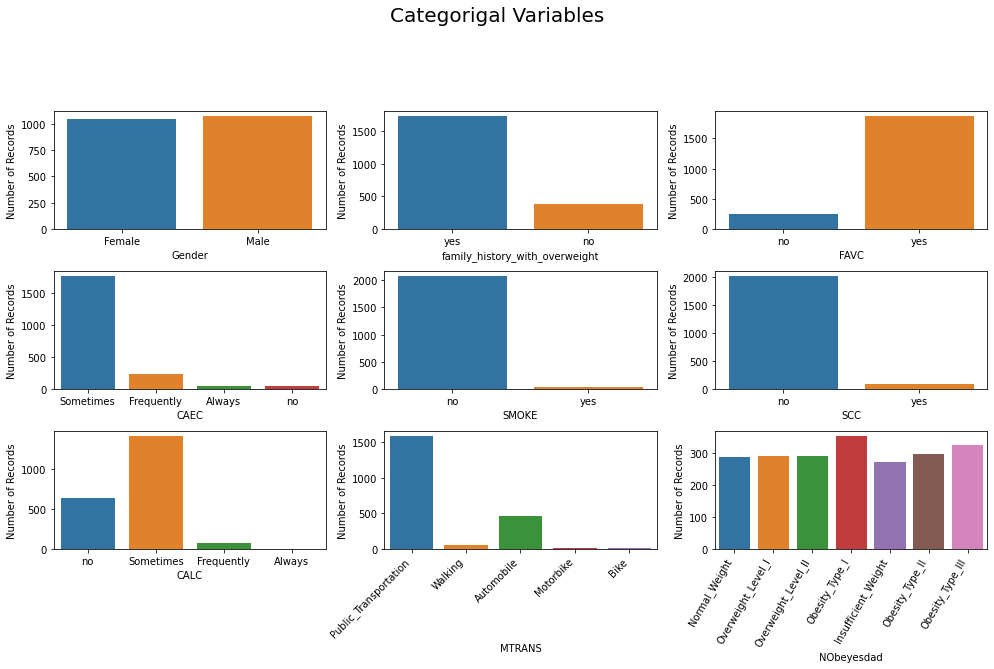

In [55]:
# columns of interest
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
           'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(df[col], ax=subplot)
    
    if col=="MTRANS":
        sns.countplot(df[col],ax=subplot)
        subplot.set_xticklabels(labels = df["MTRANS"].unique(), rotation=45, horizontalalignment='right')        
        subplot.yaxis.label.set_text("Number of Records")
    elif col=="NObeyesdad":
        sns.countplot(df[col],ax=subplot)
        subplot.set_xticklabels(labels=df["NObeyesdad"].unique(), rotation=60, horizontalalignment='right')  
        subplot.yaxis.label.set_text("Number of Records")
    else:
        sns.countplot(df[col],ax=subplot)  
        subplot.yaxis.label.set_text("Number of Records")
        
# show figure & plots
fig.suptitle("Categorigal Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.0, h_pad=1)
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

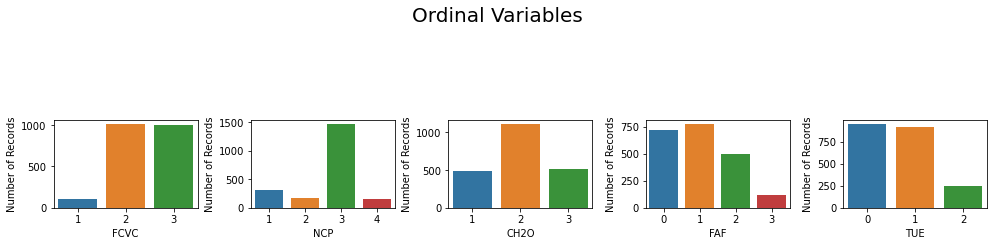

In [59]:
# columns of interest
columns = ["FCVC", "NCP", "CH2O", "FAF", "TUE"]

fig, ax = plt.subplots(1, 5, figsize=(15, 4))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(df[col], ax=subplot)
    subplot.yaxis.label.set_text("Number of Records")

# show figure & plots
fig.suptitle("Ordinal Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.7, h_pad=0.5)
plt.show()

In [88]:
# Create correlation matrix and considering only the strength of correlation by calculating absolute value of correlation coefficient
corr_matrix = df.corr().abs()

# Considering the upper traingle of the correlation matrix, just to make callculation little efficient, althouh step is not that neccesary
upper_triangle = np.triu(corr_matrix)     ##to consider only upper triangle of  the matrix, `np.triu()` i used

# Fill '1' values from the diagonal value with Nan, used this as while filetring the correlation coefficient to get those with value >0.95, it is not required to consider these diagonal values
np.fill_diagonal(corr_matrix.values, np.nan)

to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.95)]

print("Number of variables with > 0.95 correlation: ", len(to_drop))

Number of variables with > 0.95 correlation:  0


## Model building

* Models for this data need to cater to > 2 two classes
* Data is limited so model will need to perform well with limited amount of data.
* The data is not Gaussian so the model needs to be non-parametic or at least not strictly parametic
* data is petty wide but not deep, i.e., large faetures as comapred to records, so reducing features is necessary to prevent overfitting and improve model performance.

In [89]:
# Copy cleaned data to new dataframe
df_prep = df.copy()

In [90]:
df_prep.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
# create dummy variables
df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
                                          "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])
df_prep.head()

In [94]:
# split dataset in features and target variable

# Features
X = df_prep.drop(columns=["NObeyesdad"])

# Target variable
y = df_prep['NObeyesdad']

In [95]:
# splitting into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Machine Learning Models
We will apply:
* Decision Trees
* Random Forest
* Support Vector Machines (SVM)
* K Nearest Neighbors

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler # Import for standard scaling of the data
from sklearn.preprocessing import MinMaxScaler # Import for standard scaling of the data

In [98]:
# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [102]:
def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    models = [          
          ('Random Forest', RandomForestClassifier(random_state=2020)),
          ('Decision Tree', DecisionTreeClassifier()),                                                 
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC())
        ]  
    for name, model in models:        
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)
        
        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        
        # output
        print(name + ':')        
        print("---------------------------------------------------------------")      
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        if (accuracy >= scaled_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
            print("                            -----------------------------------               \n")      
        else:
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))

In [103]:
#run Decision Trees, Random Forest, KNN and SVN
run_models(X_train, y_train, X_test, y_test)

Random Forest:
---------------------------------------------------------------
Accuracy: 0.91167
Accuracy w/Scaled Data (ss): 0.91167

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.93      0.93        92
      Normal_Weight       0.69      0.83      0.75        77
     Obesity_Type_I       1.00      0.91      0.95       114
    Obesity_Type_II       0.98      1.00      0.99        85
   Obesity_Type_III       1.00      1.00      1.00        92
 Overweight_Level_I       0.90      0.78      0.83        89
Overweight_Level_II       0.88      0.92      0.90        85

           accuracy                           0.91       634
          macro avg       0.91      0.91      0.91       634
       weighted avg       0.92      0.91      0.91       634

                            -----------------------------------               

Decision Tree:
---------------------------------------------------------------
Accuracy

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

SVM:
---------------------------------------------------------------
Accuracy: 0.5694
Accuracy w/Scaled Data (ss): 0.80442

Classification Report (ss):
                      precision    recall  f1-score   support

Insufficient_Weight       0.86      0.91      0.88        92
      Normal_Weight       0.54      0.70      0.61        77
     Obesity_Type_I       0.85      0.75      0.79       114
    Obesity_Type_II       0.89      0.98      0.93        85
   Obesity_Type_III       1.00      0.98      0.99        92
 Overweight_Level_I       0.79      0.64      0.71        89
Overweight_Level_II       0.70      0.67      0.69        85

           accuracy                           0.80       634
          macro avg       0.80      0.80      0.80       634
       weighted avg       0.81      0.80      0.81       634



**Decision tree model performs better with approx.94% accuracy**